# Analyze Word Frequency Counts Using Twitter Data with the word Pedidosya

Se explora el texto asociado con un conjunto de tweets a los que accede mediante Tweepyla API de Twitter. Para ello, utiliza algunos enfoques estándar de NLP (también conocido como minería de texto).

In [5]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

from nltk import bigrams

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [7]:
consumer_key = '0jCLjpIQT1oLJ7IPkopPRRtdA'
consumer_secret = 'A8wtg3x2bq8aQRZSUZKXHVPf4HFi3Rz9NHtBcIg43W7ZTUB5Ga' 
access_token = '4906037452-q6KL9Zl5r62YJKNAu6Q8iboz1Jz1DkNDMnvRDVi'
access_token_secret ='9c8fEwaqKefoYbvgB091WJYoUGZDRcIS8asmsqPCTrUgf'


In [8]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Luego de la autenticación se toman los 10000 tweets más recientes

In [78]:
search_term = "pedidosya -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="es",
                   since='2020-05-01').items(2000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['@cuponerapedido \npedidosya\nAsí que la posta chúpame la pija\nvie., 9:29 p. m.\nHubieras contestado, mal educado\nAyer,… https://t.co/BfSDpn7JVe',
 'Codigo Cupon de rappi(2000$):\noxs4484208      \n\nCodigo Cupon uber eats(75$): \neats-xa07ln… https://t.co/gB0CPKwzI3',
 '@wertygol @pedidosya Pedidoscuandosenoscanta.',
 'El covid-19 cambió la realidad de todos y todas. Dos repartidoras nos cuentan cómo fue la experiencia de adaptarse… https://t.co/fhhwRD5BIg',
 '@23625a Hola Liliana, lamento mucho leer esto 🙁\nEnvíame tus datos por DM para poder ayudarte. ¡Saludos!']

#### Eliminar URL (enlaces)
Los tweets tienen algunos elementos como por ejemplo las URL, para eliminarlas se utilizan expresiones regulares a las que se accede desde el repaquete **re**.

In [79]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [80]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['cuponerapedido pedidosyaAs que la posta chpame la pijavie 929 p mHubieras contestado mal educadoAyer',
 'Codigo Cupon de rappi2000oxs4484208 Codigo Cupon uber eats75 eatsxa07ln',
 'wertygol pedidosya Pedidoscuandosenoscanta',
 'El covid19 cambi la realidad de todos y todas Dos repartidoras nos cuentan cmo fue la experiencia de adaptarse',
 '23625a Hola Liliana lamento mucho leer esto Envame tus datos por DM para poder ayudarte Saludos']

#### Limpieza del texto

In [81]:
# capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

#all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [82]:
#only unique words
set(lower_case)

{',', 'cat', 'dog'}

In [83]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()

['cuponerapedido',
 'pedidosyaAs',
 'que',
 'la',
 'posta',
 'chpame',
 'la',
 'pijavie',
 '929',
 'p',
 'mHubieras',
 'contestado',
 'mal',
 'educadoAyer']

In [84]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['cuponerapedido',
 'pedidosyaas',
 'que',
 'la',
 'posta',
 'chpame',
 'la',
 'pijavie',
 '929',
 'p',
 'mhubieras',
 'contestado',
 'mal',
 'educadoayer']

In [85]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['cuponerapedido',
  'pedidosyaas',
  'que',
  'la',
  'posta',
  'chpame',
  'la',
  'pijavie',
  '929',
  'p',
  'mhubieras',
  'contestado',
  'mal',
  'educadoayer'],
 ['codigo',
  'cupon',
  'de',
  'rappi2000oxs4484208',
  'codigo',
  'cupon',
  'uber',
  'eats75',
  'eatsxa07ln']]

#### Calcular y trazar la frecuencia de palabras

Para obtener el recuento de cuántas veces aparece cada palabra en la muestra, se puede usar la libarary *collections*, que ayuda a crear un tipo especial de un objeto. Tiene un método incorporado útil *most_common* que devolverá las palabras más comúnmente utilizadas y la cantidad de veces que se usan. 

In [86]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(5)

[('pedidosya', 1659), ('de', 1051), ('y', 793), ('que', 764), ('me', 648)]

In [87]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,pedidosya,1659
1,de,1051
2,y,793
3,que,764
4,me,648


Se crea el gráfico

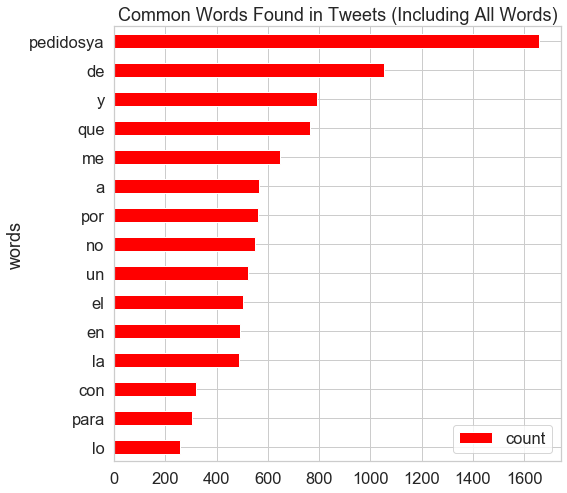

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

#### Eliminar stopwords con nltk

Además de las palabras en minúscula, se debe realizar una limpieza adicional, para eliminar palabras que no agregan información significativa al texto. Estas palabras se conocen como "stopwoerds" e incluyen palabras que aparecen comúnmente como quién, qué, usted, etc.

In [89]:
#Remove Stopwords With nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\letos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
stop_words = set(stopwords.words('spanish'))

# View a few words from the set
list(stop_words)[0:10]

['estaremos',
 'a',
 'que',
 'sea',
 'algunos',
 'estemos',
 'con',
 'sentidos',
 'seremos',
 'suyos']

In [91]:
words_in_tweet[0]

['cuponerapedido',
 'pedidosyaas',
 'que',
 'la',
 'posta',
 'chpame',
 'la',
 'pijavie',
 '929',
 'p',
 'mhubieras',
 'contestado',
 'mal',
 'educadoayer']

In [92]:
#for all_words in words_in_tweet:
    #for a word in all_words:
        # remove stop words

In [93]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['cuponerapedido',
 'pedidosyaas',
 'posta',
 'chpame',
 'pijavie',
 '929',
 'p',
 'mhubieras',
 'contestado',
 'mal',
 'educadoayer']

In [94]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('pedidosya', 1659),
 ('pedido', 192),
 ('hola', 177),
 ('si', 124),
 ('favor', 118),
 ('cupn', 104),
 ('delivery', 86),
 ('hace', 85),
 ('dm', 83),
 ('cupones', 80),
 ('pedidos', 77),
 ('md', 75),
 ('gracias', 73),
 ('app', 71),
 ('ms', 70)]

Una vez limpiada la data se vuelve a graficar la frecuencia de las palabras.

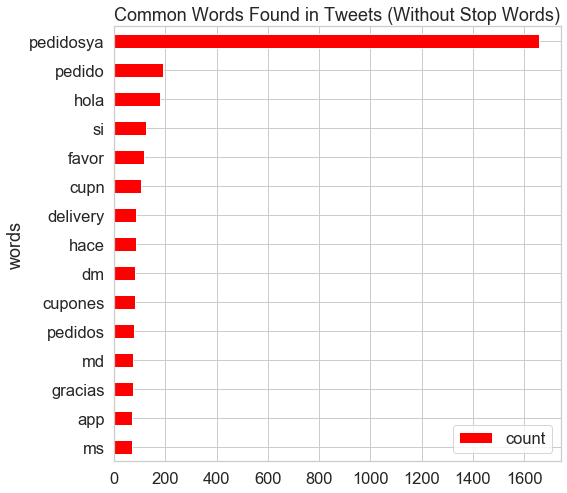

In [95]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

Limpieza adicional de palabras que no son stopwords pero que no aportan información o que se usaron para ralizar la búsqueda.

In [96]:
#Remove Collection Words
collection_words = ['pedidosya','hola', 'md','si','hace','q','qu','ms','da','hacer','ayudarte','hoy','ped','pedir']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [97]:
tweets_nsw[0]

['cuponerapedido',
 'pedidosyaas',
 'posta',
 'chpame',
 'pijavie',
 '929',
 'p',
 'mhubieras',
 'contestado',
 'mal',
 'educadoayer']

In [98]:
tweets_nsw_nc[0]

['cuponerapedido',
 'pedidosyaas',
 'posta',
 'chpame',
 'pijavie',
 '929',
 'p',
 'mhubieras',
 'contestado',
 'mal',
 'educadoayer']

In [99]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('pedido', 192),
 ('favor', 118),
 ('cupn', 104),
 ('delivery', 86),
 ('dm', 83),
 ('cupones', 80),
 ('pedidos', 77),
 ('gracias', 73),
 ('app', 71),
 ('nunca', 70),
 ('glovoar', 63),
 ('hice', 59),
 ('lamento', 57),
 ('rappi', 57),
 ('glovo', 49)]

In [100]:
len(counts_nsw_nc)

5383

In [101]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(20),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,pedido,192
1,favor,118
2,cupn,104
3,delivery,86
4,dm,83


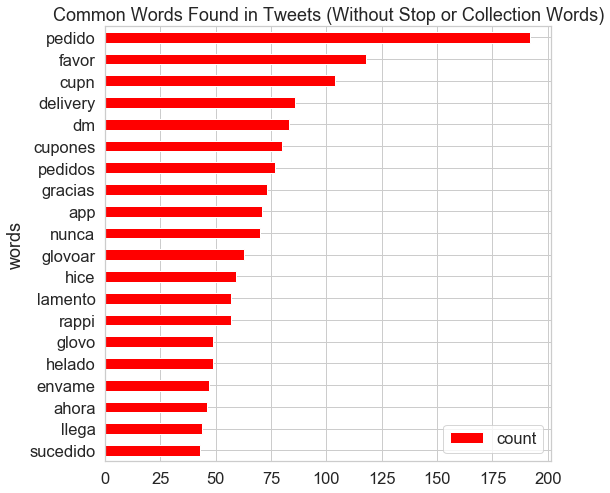

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

### Explorar palabras concurrentes (Bigrams)
Para identificar la coincidencia de palabras en los tweets, puede usar *bigrams* desde *nltk*.

In [103]:
import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

In [104]:
#Explore Co-occurring Words (Bigrams)

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('cuponerapedido', 'pedidosyaas'),
 ('pedidosyaas', 'posta'),
 ('posta', 'chpame'),
 ('chpame', 'pijavie'),
 ('pijavie', '929'),
 ('929', 'p'),
 ('p', 'mhubieras'),
 ('mhubieras', 'contestado'),
 ('contestado', 'mal'),
 ('mal', 'educadoayer')]

De manera similar a lo anterior, se puede usar un contador para capturar los bigrams diccionarios y sus conteos son valores de diccionario.

In [105]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('glovoar', 'romariopizza'), 34),
 (('jotatraderok', 'glovoar'), 33),
 (('lamento', 'sucedido'), 30),
 (('hice', 'pedido'), 30),
 (('favor', 'envame'), 29),
 (('sucedido', 'favor'), 21),
 (('escrbeme', 'dm'), 20),
 (('favor', 'escrbeme'), 19),
 (('franco', 'almada'), 17),
 (('datos', 'favor'), 15),
 (('muchas', 'gracias'), 15),
 (('envame', 'dm'), 15),
 (('preparando', 'chorrillana'), 15),
 (('rappi', 'glovo'), 13),
 (('harrys', 'bar'), 13),
 (('dzapatillas', 'dndconsumidor'), 11),
 (('dndconsumidor', 'soldepresbitero'), 11),
 (('sigo', 'esperando'), 11),
 (('primer', 'pedido'), 11),
 (('delivery', 'harrys'), 11)]

In [106]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(glovoar, romariopizza)",34
1,"(jotatraderok, glovoar)",33
2,"(lamento, sucedido)",30
3,"(hice, pedido)",30
4,"(favor, envame)",29
5,"(sucedido, favor)",21
6,"(escrbeme, dm)",20
7,"(favor, escrbeme)",19
8,"(franco, almada)",17
9,"(datos, favor)",15


#### Visualizar redes de bigrams
Se utiliza *Pandas Dataframe* para visualizar los 20 bigrams principales como redes usando el paquete NetworkX.

In [107]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [108]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("rappi", weight=100)

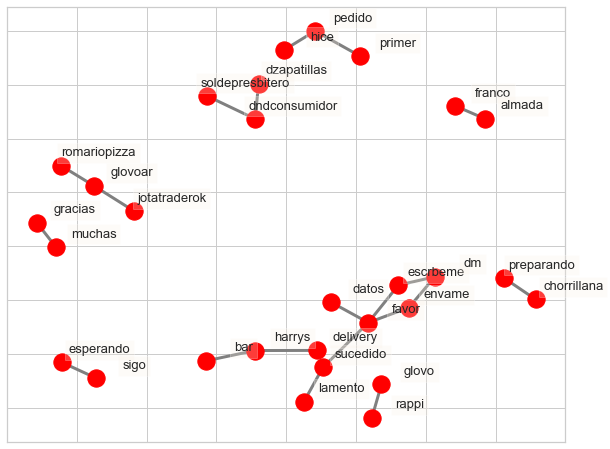

In [109]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='linen', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# Analyze The Sentiment of Tweets

El análisis de sentimientos es un método para identificar actitudes en los datos de texto sobre un tema de interés. Se puntúa utilizando valores de polaridad que oscilan entre 1 y -1. Los valores más cercanos a 1 indican más positividad, mientras que los valores más cercanos a -1 indican más negatividad.

In [43]:
import networkx
from textblob import TextBlob

In [121]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "pedidosya -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="es",
                   since='2020-05-01').items(1000)

In [122]:
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

TweepError: Twitter error response: status code = 429

##### Analizar sentimientos en tweets
SE utiliza el paquete *textblob* para calcular los valores de polaridad de los tweets que contengan la palabra de interés.

SE empieza creando objetos *textblob*, que asignan valores de polaridad a los tweets. Se identifica el valor de polaridad utilizando el atributo *.polarity* del objeto *texblob*.

In [59]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[725]

(0.0,
 TextBlob("Y pedidosya me acaba de regalar 200 siiiiii es mi da de luck XD"))

In [58]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[725]

(0.0,
 TextBlob("Y pedidosya me acaba de regalar 200 siiiiii es mi da de luck XD"))

In [60]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[725]

[0.0, 'Y pedidosya me acaba de regalar 200 siiiiii es mi da de luck XD']

In [61]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.0,cuponerapedido pedidosyaAs que la posta chpame...
1,0.0,Codigo Cupon de rappi2000oxs4484208 Codigo Cup...
2,0.0,wertygol pedidosya Pedidoscuandosenoscanta
3,0.0,El covid19 cambi la realidad de todos y todas ...
4,0.0,23625a Hola Liliana lamento mucho leer esto En...


Estos valores de polaridad se pueden graficar en un histograma, ayuda a resaltar el sentimiento general (es decir, mayor positividad o negatividad).

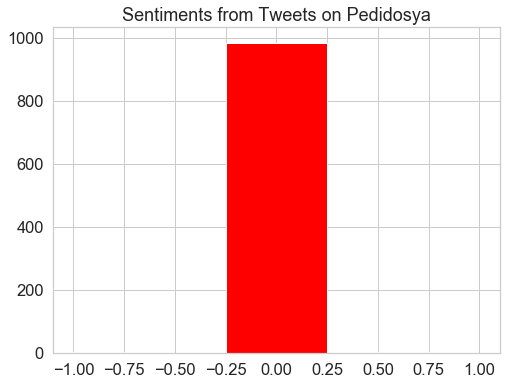

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Sentiments from Tweets on Pedidosya")
plt.show()

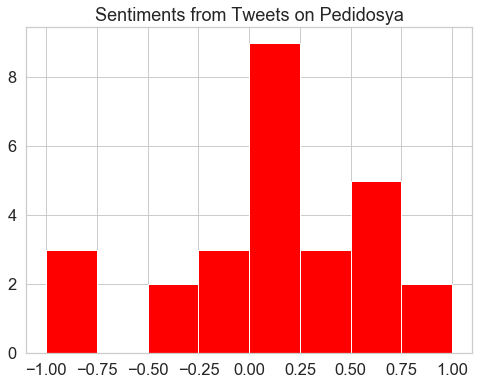

In [63]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Sentiments from Tweets on Pedidosya")
plt.show()

#### Positividad o Negatividad

In [117]:
# Importing the libraries
import tweepy
import re
import pickle

from tweepy import OAuthHandler

In [120]:
tweets       

In [114]:
total_pos = 0
total_neg = 0

# Preprocessing the tweets and predicting sentiment
for tweet in tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1


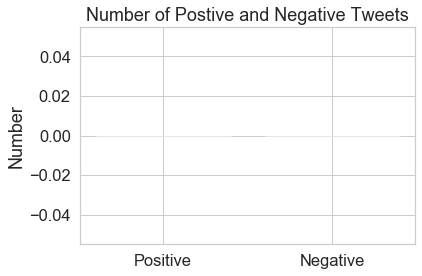

In [115]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')

plt.show()